In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
df = pd.read_csv("index dataset.csv")

In [3]:
df = df[df['Year'] >= 1990]
df

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
499,1990,1,1,8.25,0.0,0.00,8.23,4.500000,5.4,4.4
500,1990,2,1,8.25,0.0,0.00,8.24,0.700000,5.3,4.6
501,1990,3,1,8.25,0.0,0.00,8.28,0.700000,5.2,4.9
502,1990,4,1,8.25,0.0,0.00,8.26,1.600000,5.4,4.8
503,1990,5,1,8.25,0.0,0.00,8.18,0.700000,5.4,4.8
...,...,...,...,...,...,...,...,...,...,...
959,2022,8,1,1.00,4.5,4.25,2.33,0.330000,3.5,6.5
960,2022,9,1,1.00,4.5,4.25,2.56,3.200000,3.7,6.5
961,2022,10,1,1.00,4.5,4.25,3.08,0.330000,3.7,6.5
962,2022,11,1,1.00,4.5,4.25,3.78,0.330000,3.6,6.5


In [4]:
import datetime
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [5]:
df=df.drop(['Year','Month','Day'],axis=1)

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.5 MB/s eta 0:00:00


In [6]:
df.set_index('Date', inplace=True)

In [7]:
df

,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
Date,,,,,,,
1990-01-01,8.25,0.0,0.00,8.23,4.500000,5.4,4.4
1990-02-01,8.25,0.0,0.00,8.24,0.700000,5.3,4.6
1990-03-01,8.25,0.0,0.00,8.28,0.700000,5.2,4.9
1990-04-01,8.25,0.0,0.00,8.26,1.600000,5.4,4.8
1990-05-01,8.25,0.0,0.00,8.18,0.700000,5.4,4.8
...,...,...,...,...,...,...,...
2022-08-01,1.00,4.5,4.25,2.33,0.330000,3.5,6.5
2022-09-01,1.00,4.5,4.25,2.56,3.200000,3.7,6.5
2022-10-01,1.00,4.5,4.25,3.08,0.330000,3.7,6.5


In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
adf_test(df['Federal Funds Target Rate'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.795852
p-value                          0.058869
#Lags Used                       5.000000
Number of Observations Used    459.000000
Critical Value (1%)             -3.444677
Critical Value (5%)             -2.867857
Critical Value (10%)            -2.570135
dtype: float64


In [ ]:
#defining function for kpss test
from statsmodels.tsa.stattools import kpss
#defining KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key, val in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = val
      return kpss_output      

In [ ]:
kpss_test(df['Federal Funds Target Rate'])

Results of KPSS Test:


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Test Statistic           2.404851
p-value                  0.010000
Lags Used               12.000000
Critical Value (10%)     0.347000
dtype: float64

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 

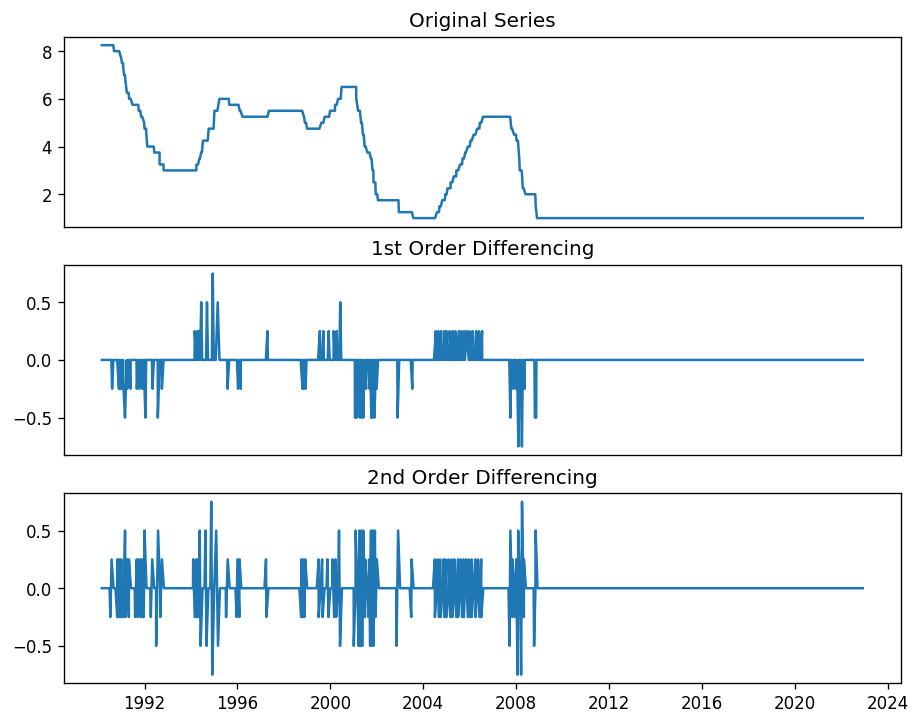

In [ ]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df['Federal Funds Target Rate']); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)

# 1st Differencing
ax2.plot(df['Federal Funds Target Rate'].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)

#2nd order 
ax3.plot(df['Federal Funds Target Rate'].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

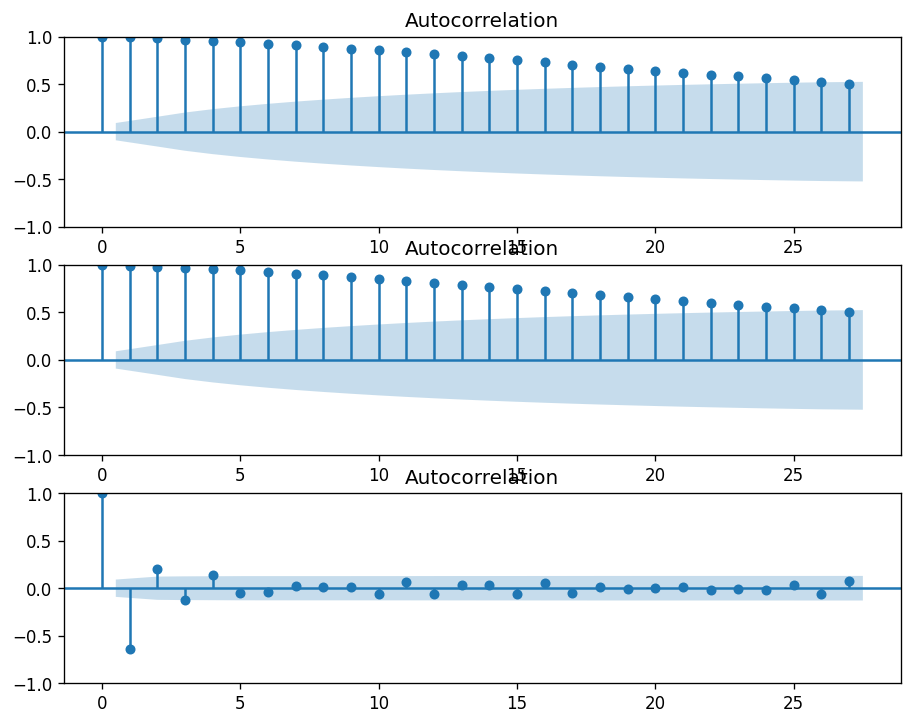

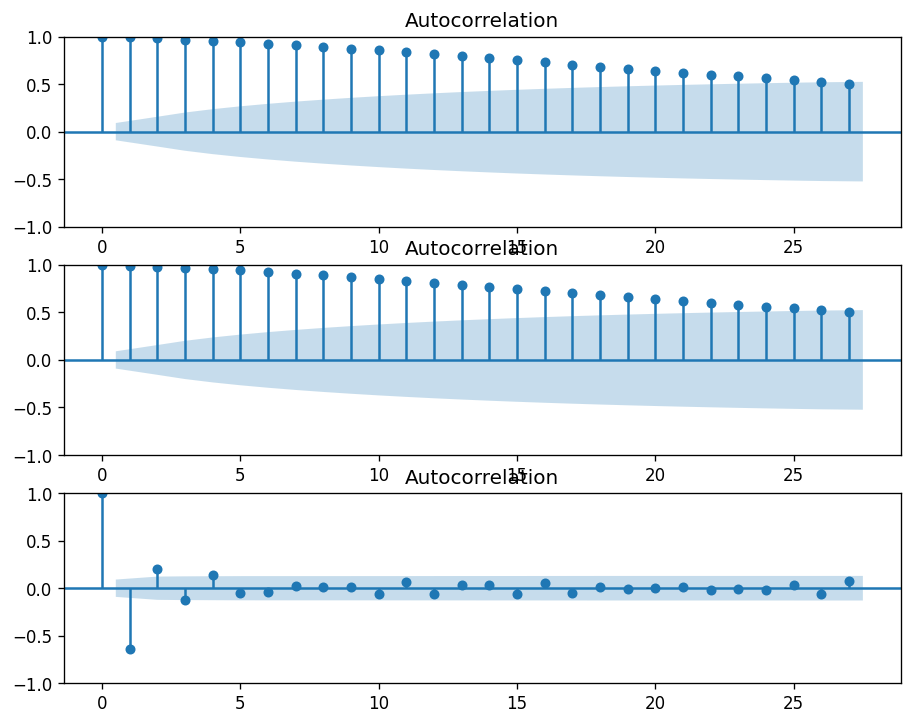

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df['Federal Funds Target Rate'], ax=ax1)
plot_acf(df['Federal Funds Target Rate'].dropna(), ax=ax2)
plot_acf(df['Federal Funds Target Rate'].diff().diff().dropna(), ax=ax3)

#d=1

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


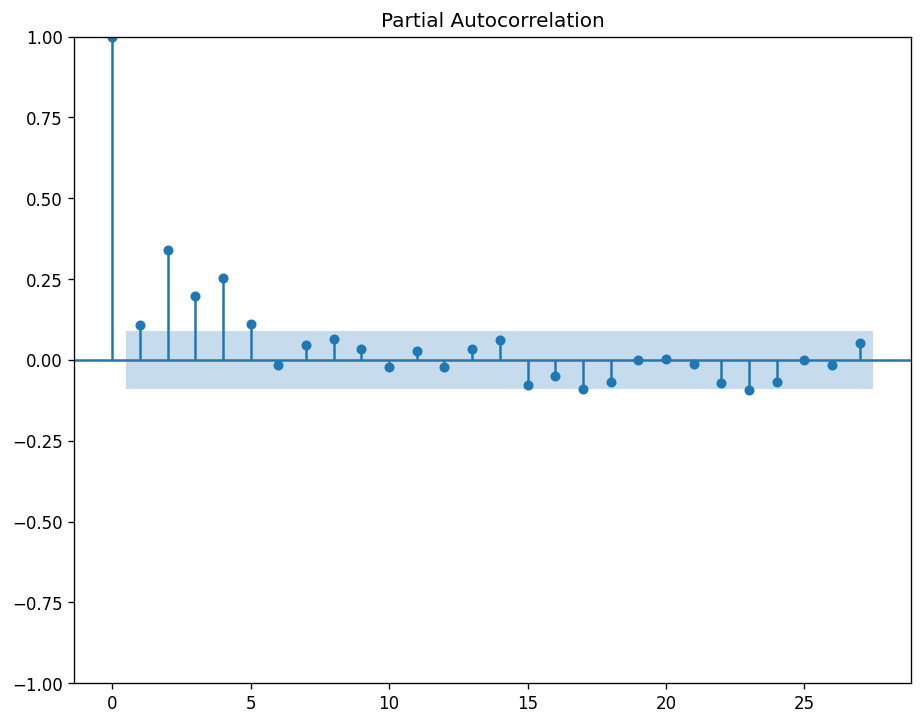

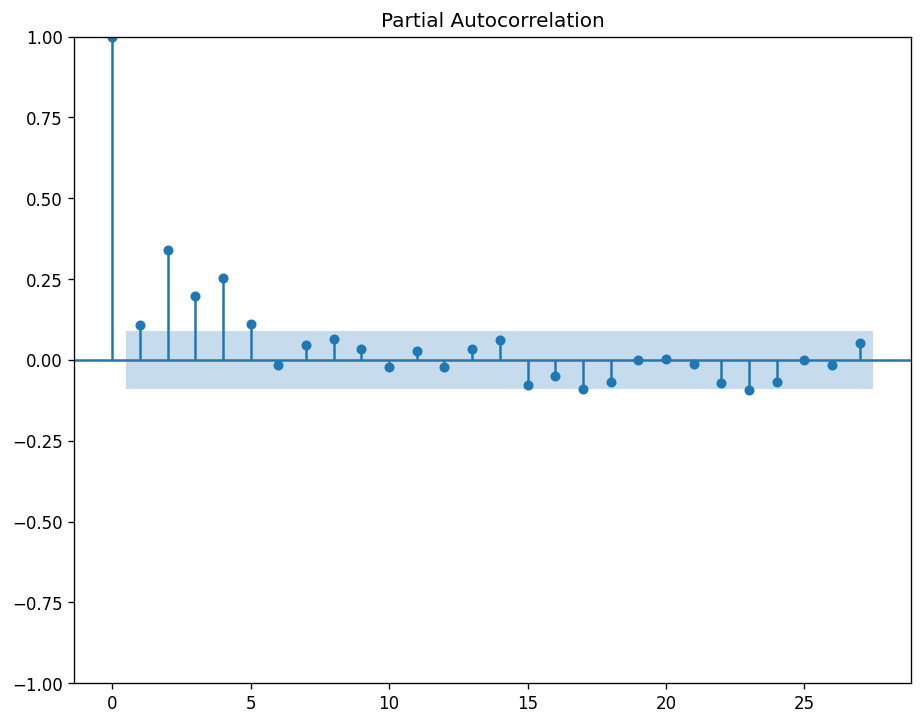

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Federal Funds Target Rate'].diff().dropna()) #p=1

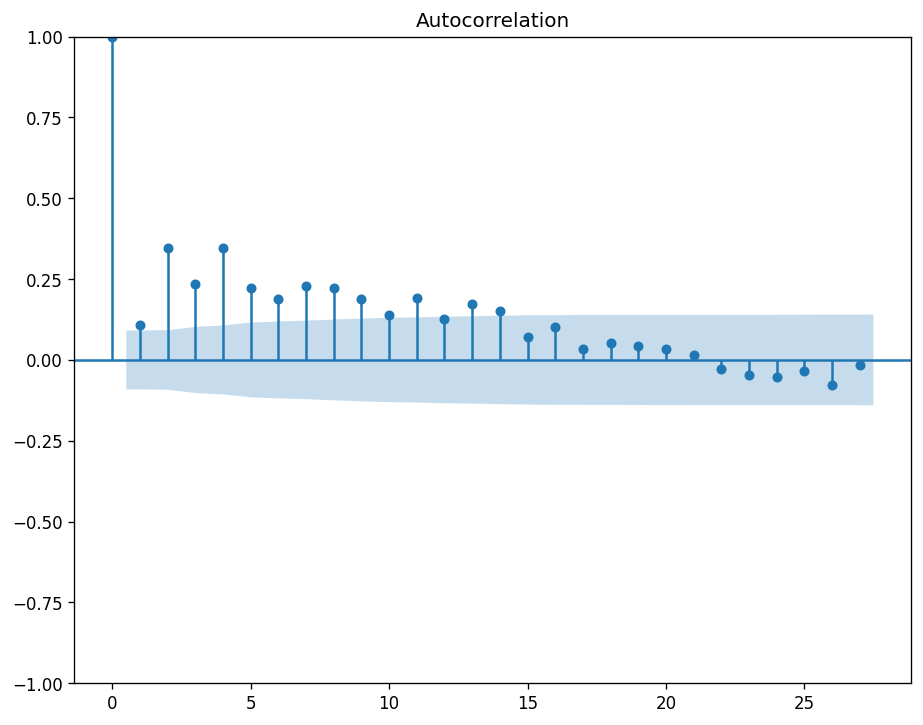

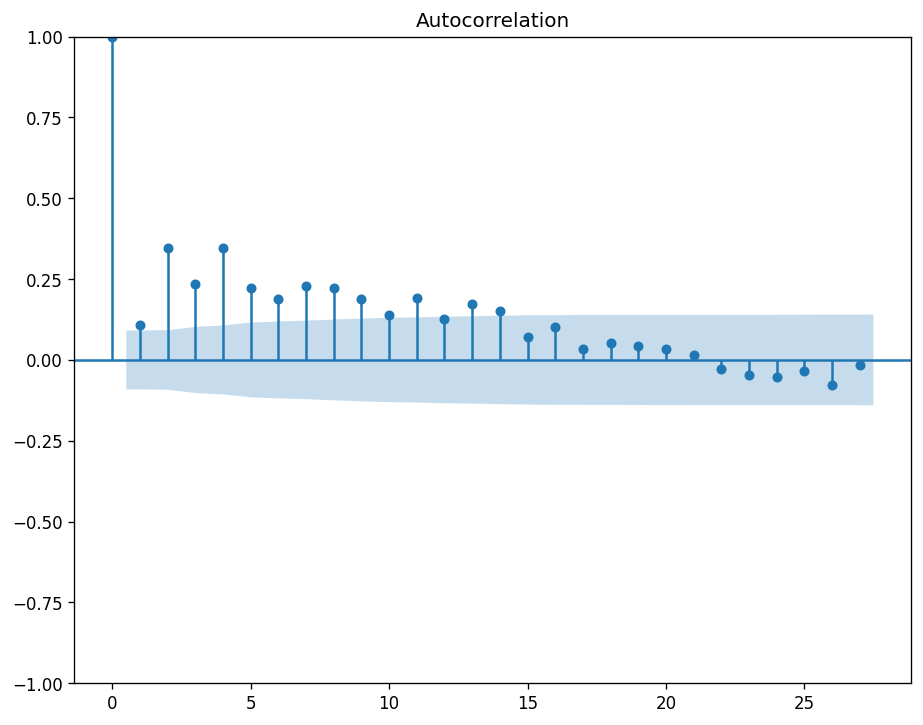

In [ ]:
plot_acf(df['Federal Funds Target Rate'].diff().dropna())#q=2

In [ ]:
from pmdarima import auto_arima
import warnings 
warnings.filterwarnings("ignore")

<Axes: xlabel='Date'>

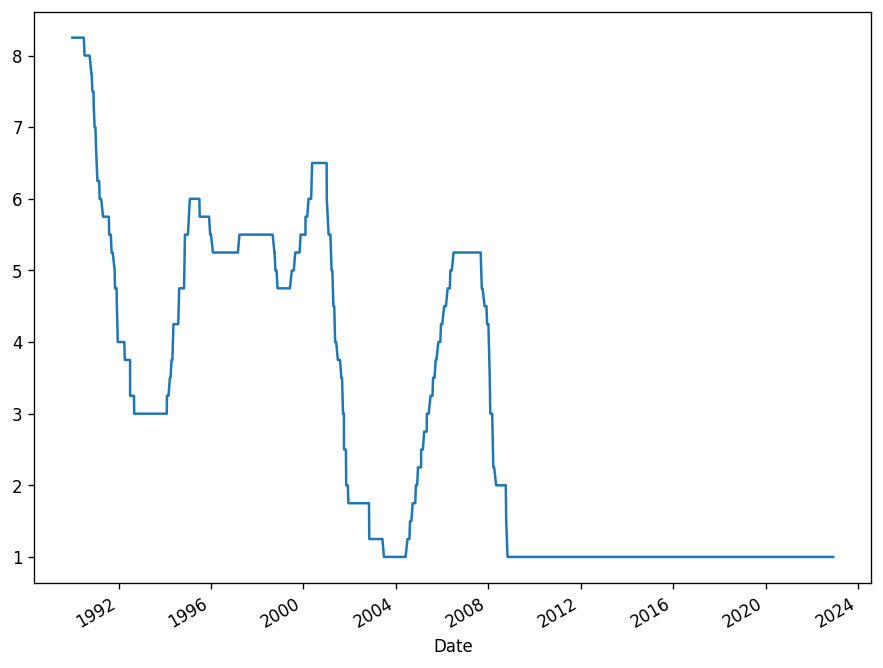

In [ ]:
# df['Federal Funds Target Rate'] = df['Federal Funds Target Rate'] - df['Federal Funds Target Rate'].shift(1)
# df['Federal Funds Target Rate'].dropna(inplace=True)
df['Federal Funds Target Rate'].plot()

In [ ]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape, test.shape)

(465, 7)
(435, 7) (30, 7)


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = sm.tsa.arima.ARIMA(train['Federal Funds Target Rate'], order=(3,3,3))

model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     Federal Funds Target Rate   No. Observations:                  435
Model:                        ARIMA(3, 3, 3)   Log Likelihood                 241.638
Date:                       Mon, 24 Apr 2023   AIC                           -469.276
Time:                               20:35:25   BIC                           -440.797
Sample:                                    0   HQIC                          -458.033
                                       - 435                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2682      0.124    -10.263      0.000      -1.510      -1.026
ar.L2         -0.3075      0.083     -3.685      0.000      -0.471      -0.144
ar.L3         -0.0193      0.041     -0.471      0.638      -0.100       0.061
ma.L1         -0.7751      0.180     -4.304      0.000      -1.128      -0.422
ma.L2         -0.9407      0.199     -4.733      0.000      -1.330      -0.551
ma.L3          0.7161      0.136      5.271      0.000       0.450       0.982
sigma2         0.0187      0.003      6.919      0.000       0.013       0.024
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               378.46
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                            -0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)
pred.index=df.index[start:end+1]
print(pred)

435    1.000201
436    1.000479
437    1.000722
438    1.001106
439    1.001445
440    1.001923
441    1.002360
442    1.002932
443    1.003467
444    1.004132
445    1.004765
446    1.005524
447    1.006255
448    1.007107
449    1.007936
450    1.008882
451    1.009809
452    1.010849
453    1.011874
454    1.013008
455    1.014130
456    1.015358
457    1.016577
458    1.017900
459    1.019216
460    1.020633
461    1.022047
462    1.023558
463    1.025070
464    1.026675
Name: predicted_mean, dtype: float64
Date
2020-07-01    1.000201
2020-08-01    1.000479
2020-09-01    1.000722
2020-10-01    1.001106
2020-11-01    1.001445
2020-12-01    1.001923
2021-01-01    1.002360
2021-02-01    1.002932
2021-03-01    1.003467
2021-04-01    1.004132
2021-05-01    1.004765
2021-06-01    1.005524
2021-07-01    1.006255
2021-08-01    1.007107
2021-09-01    1.007936
2021-10-01    1.008882
2021-11-01    1.009809
2021-12-01    1.010849
2022-01-01    1.011874
2022-02-01    1.013008
2022-03-01    1.01

In [ ]:
pred

Date
2020-07-01    1.000201
2020-08-01    1.000479
2020-09-01    1.000722
2020-10-01    1.001106
2020-11-01    1.001445
2020-12-01    1.001923
2021-01-01    1.002360
2021-02-01    1.002932
2021-03-01    1.003467
2021-04-01    1.004132
2021-05-01    1.004765
2021-06-01    1.005524
2021-07-01    1.006255
2021-08-01    1.007107
2021-09-01    1.007936
2021-10-01    1.008882
2021-11-01    1.009809
2021-12-01    1.010849
2022-01-01    1.011874
2022-02-01    1.013008
2022-03-01    1.014130
2022-04-01    1.015358
2022-05-01    1.016577
2022-06-01    1.017900
2022-07-01    1.019216
2022-08-01    1.020633
2022-09-01    1.022047
2022-10-01    1.023558
2022-11-01    1.025070
2022-12-01    1.026675
Name: predicted_mean, dtype: float64

<Axes: xlabel='Date'>

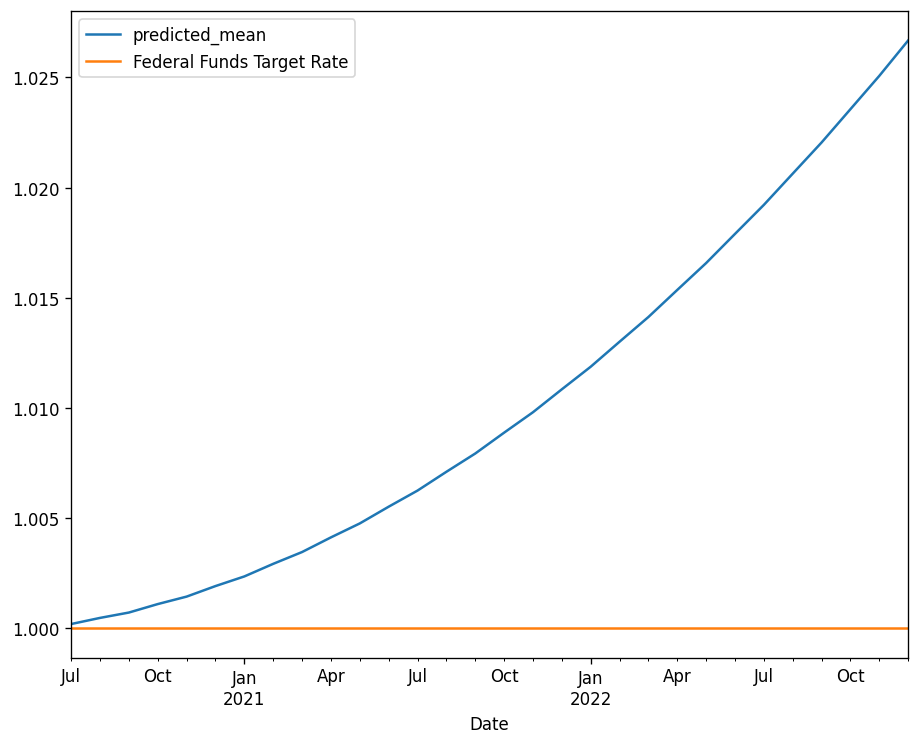

In [ ]:
pred.plot(legend=True)
test['Federal Funds Target Rate'].plot(legend=True)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mae = mean_absolute_error(test['Federal Funds Target Rate'], pred)

In [ ]:
mae

0.010198060270537941